In [1]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

**Questão 7:**
Um determinado artigo científico garante que o classificador proposto consegue valores de kappa superiores a 0,8. A partir  dos dois mapas abaixo, teste o resultado deste novo classificador escolhendo uma amostra aleatória de 60 pontos e construa a matriz de confusão entre os mapas de referência e o resultante da classificação. Identifique no mapa as amostras escolhidas. Calcule a exatidão total e o kappa, verificando se o mesmo difere significativamente do valor 0,8. O que você conclui? O valor de exatidão total é sempre maior que o kappa? Com base na matriz de confusão, qual é a classe que apresenta os maiores erros do ponto de vista do produtor? E do ponto de vista do consumidor? Qual o significado de cada um desses erros?

In [2]:
#Mapa de Classificação
map_class = np.array([[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                [1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                [1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3],
                [1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3],
                [1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3],
                [1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3],
                [1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3],
                [1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3],
                [1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3],
                [1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3],
                [1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3],
                [1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3],
                [1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3],
                [1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3],
                [1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3],
                [1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3],
                [3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3],
                [3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3],
                [3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3],
                [3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3],
                [3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3],
                [2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3],
                [2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3],
                [2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3],
                [2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
                [2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3],
                [2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
                [2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
                [2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
                [2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1],
                [2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1],
                [2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1],
                [2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1],
                [2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
                [2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                [2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2],
                [2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2],
                [2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])


In [3]:
#Mapa de Referencia
map_ref = np.array([[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3],
                 [1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3],
                 [1, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3],
                 [1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3],
                 [1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3],
                 [1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3],
                 [1, 1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3],
                 [1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3],
                 [1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [1, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                 [2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
                 [2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3],
                 [2, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3],
                 [2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3],
                 [2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3],
                 [2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3],
                 [2, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3],
                 [2, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3],
                 [2, 2, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3],
                 [2, 3, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 3],
                 [2, 3, 2, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
                 [2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1],
                 [2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1],
                 [2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1],
                 [2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1],
                 [2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1],
                 [2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2],
                 [2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2],
                 [2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])


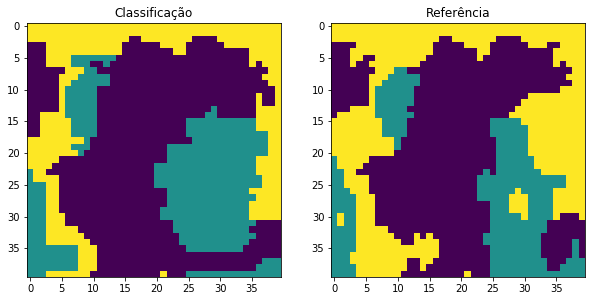

In [4]:
# desenhando na tela
plt.figure( figsize=(10, 10) )
plt.figure(1)
plt.subplot(1,2,1)
plt.title('Classificação')
plt.imshow(map_class)
plt.colorbar

plt.subplot(1,2,2)
plt.imshow(map_ref)
plt.colorbar
plt.title('Referência')
plt.show()

In [5]:
#testando 

import random
aleat = random.randint(0,1599)  #Comando para seleção aleatória das amostras

#Localizando a posição das amostras na matriz/vetor
linha = aleat // 40 #Retorna o valor inteiro da divisão
coluna = aleat - (linha * 40)

#testando a codição map_class = map_ref
if map_class[linha, coluna] == map_ref[linha, coluna]:
    valorclas = map_class[linha][coluna]
    valorref = map_ref[linha][coluna]
    print("São iguais: valor class", valorclas, "valor ref", valorref)
else:
    valorclas = map_class[linha][coluna]
    valorref = map_ref[linha][coluna]
    print("Não são iguais: valor class =", valorclas, "valor ref =", valorref)
    


São iguais: valor class 1 valor ref 1


In [6]:
#Comparando a classificação com a referência


#declarando váriaveis vazias
#classificação correta
cc1 = 0
cc2 = 0
cc3 = 0

#classificação errada
ce12 = 0
ce13 = 0
ce21 = 0
ce23 = 0
ce31 = 0
ce32 = 0

#contador para 60 sorteios
cont = 0

#Fazendo uma cópia da matriz (map_clas) para gerar o mapa com a localização das amostras
map_clas_old = map_class
map_clas_new = map(list, map_clas_old)
map_clas_new = list(map(list, map_clas_old))

#Fazendo uma cópia da matriz (map_ref) para gerar o mapa com a localização das amostras
map_clasref_old = map_ref
map_clasref_new = map(list, map_clasref_old)
map_clasref_new = list(map(list, map_clasref_old))
    
while cont < 60:
    #sorteando variáveis aleatórias entre 1 e 1600 (como o python inicia em 0, então intervalo é de 0 a 1599)
    aleat = random.randint(0,1599)
    linha = aleat // 40
    coluna = aleat - (linha * 40)
    #substituindo valores sorteados na matriz por zero (apenas para iustrar na figura onde ocorreram as amostras)
    map_clas_new[linha][coluna] = 0 
    map_clasref_new[linha][coluna] = 0

    #Condição caso as amostras selecionadas sejam iguais entre classificação e referência
    if map_class[linha, coluna] == map_ref[linha, coluna]:
        valorclas = map_class[linha][coluna]
        valorref = map_ref[linha][coluna]
        
        if map_class[linha, coluna] == 1:
            cc1 += 1
        if map_class[linha, coluna] == 2:
            cc2 += 1
        if map_class[linha, coluna] == 3:
            cc3 += 1
    #Condição contrária, caso as amostras selecionadas sejam diferentes entre classificação e referência
    else:
        valorclas = map_class[linha][coluna]
        valorref = map_ref[linha][coluna]
        
        if map_class[linha, coluna] == 1 and map_ref[linha, coluna] == 2:
            ce12 += 1
        if map_class[linha, coluna] == 1 and map_ref[linha, coluna] == 3:
            ce13 +=1
            
        if map_class[linha, coluna] == 2 and map_ref[linha, coluna] == 1:
            ce21 += 1
        if map_class[linha, coluna] == 2 and map_ref[linha, coluna] == 3:
            ce23 +=1
            
        if map_class[linha, coluna] == 3 and map_ref[linha, coluna] == 1:
            ce31 += 1
        if map_class[linha, coluna] == 3 and map_ref[linha, coluna] == 2:
            ce32 +=1
            
    cont = cont + 1

  



In [7]:
#Construação da Tabela Matriz de confusão

#somando linhas 
totallin1 = cc1 + ce12 + ce13
totallin2 = ce21 + cc2 + ce23
totallin3 = ce31 + ce32 + cc3

#Somando colunas
totalcol1 = cc1 + ce21 + ce31
totalcol2 = ce12 + cc2 + ce32
totalcol3 = ce13 + ce23 + cc3


totalgeral = totalcol1 + totalcol2 + totalcol3

#Gerando tabela apenas com as classes 
matriz = np.array([[cc1, ce12, ce13],[ce21, cc2, ce23],[ce31, ce32, cc3]])

#Gerando tabela geral
matrizgeral = np.array([[cc1, ce12, ce13, totallin1],[ce21, cc2, ce23, totallin2],[ce31, ce32, cc3, totallin3], [totalcol1, totalcol2, totalcol3, totalgeral]])

In [8]:
from pandas import DataFrame

#Construindo a visualização da Tabela, mostrando apenas as classes

dfmatriz = pd.DataFrame(matriz)
dfmatriz.index = ['class %s' % pc for pc in dfmatriz.index + 1]
dfmatriz.columns = ['class %s' % pc for pc in dfmatriz.columns + 1]

dfmatriz

,class 1,class 2,class 3
class 1,29,2,3
class 2,1,4,8
class 3,0,1,12


In [9]:
#Somando as diagonais da tabela de classes

array = np.array(dfmatriz)
diag = sum(np.diag(array))
diag

45

In [10]:
from pandas import DataFrame

#Construindo a visualização da Tabela Geral

dfmatriz = pd.DataFrame(matrizgeral)
dfmatriz.index = ['class 1', 'class 2', 'class 3', 'Total']
dfmatriz.columns = ['class 1', 'class 2', 'class 3', 'Total']

dfmatriz

,class 1,class 2,class 3,Total
class 1,29,2,3,34
class 2,1,4,8,13
class 3,0,1,12,13
Total,30,7,23,60


<br>
### Calculando kappa, Exatidão Global, Acurácias e Erros

Índice de kappa é dado por:
<br>
<br>
$\kappa = \frac{N\sum X_{ii} - \sum X_{i+}X_{+i}}{{N^2}-\sum X_{i+}X_{+i}}$
<br>
<br>
Em que: 
<br>
$X_{ii}$ = Concordância observada
<br>
$X_{+i}$ e $X_{i+}$ = (produto das marginais), sendo a concordância esperada
<br>
N = total de elementos observados
<br>
<br>
<br>
Exatidão Global é dada por: 
<br>
<br>
$EG_{m} = \frac{\sum X_{i}}{N} * 100$
<br>
<br>
Em que: 
<br>
$EG_{m}$ = exatidão global
<br>
$X_{i}$ = elemento na diagonal
<br>
N = total de elementos amostrados
<br>
<br>
<br>
Exatidão do Usuário é dada por:
<br>
<br>
$E_{u} = \frac{X_{ii}}{X_{i+}}*100$
<br>
<br>
Em que: 
<br>
$E_{u}$ = exatidão do usuário
<br>
<br>
<br>
Exatidão do Produtor é dada por:
<br>
<br>
$E_{p} = \frac{X_{ii}}{X_{+I}}*100$
<br>
<br>
Em que: 
<br>
$E_{p}$ = exatidão do produtor
<br>
<br>
<br>
Erro de Omissão é dado por:
<br>
<br>
$E_{o} = \frac{X_{i+} - X_{ii}}{X_{i+}}$
<br>
<br>
Em que: 
<br>
$E_{o}$ = erros de omissão
<br>
$X_{i+}$ = marginal da linha
<br>
$X_{ii}$ = diagonal daquela linha
<br>
<br>
<br>
Erro de Comissão (inclusão) é dado por:
<br>
<br>
$E_{co} = \frac{X_{+i} - X_{ii}}{X_{+i}}$
<br>
<br>
Em que: 
<br>
$E_{co}$ = erros de comissão (inclusão)
<br>
$X_{+i}$ = marginal da coluna
<br>
$X_{ii}$ = diagonal daquela coluna

In [11]:
#Calculando a Exatidão Global
EG = (diag/totalgeral)*100
print("Exatidão global =", EG)

#Calculando o Kappa
kappa = (totalgeral*(cc1+cc2+cc3)-((totalcol1*totallin1)+(totalcol2*totallin2)+(totalcol3*totallin3)))/((totalgeral**2)-((totalcol1*totallin1)+(totalcol2*totallin2)+(totalcol3*totallin3)))
print("Kappa =", kappa)

#Calculando a Exatidão do Consumidor
EU_clas1 = (cc1/totallin1)*100
print("Exatidão Usuário clas 1 = ", EU_clas1)
EU_clas2 = (cc2/totallin2)*100
print("Exatidão Usuário clas 2 = ", EU_clas2)
EU_clas3 = (cc3/totallin3)*100
print("Exatidão Usuário clas 3 = ", EU_clas3)

#Calculando Exatidão do Produtor
EP_clas1 = (cc1/totalcol1)*100
print("Exatidão Produtor clas 1 = ", EP_clas1)
EP_clas2 = (cc2/totalcol2)*100
print("Exatidão Produtor clas 2 = ", EP_clas2)
EP_clas3 = (cc3/totalcol3)*100
print("Exatidão Produtor  clas 3 = ", EP_clas3)

#Calculando o Erro Omissão 
EO_clas1 = ((totallin1-cc1)/totallin1)*100
print("Erro de Omissão Class 1 = ", EO_clas1)
EO_clas2 = ((totallin2-cc2)/totallin2)*100
print("Erro de Omissão Class 2 = ", EO_clas2)
EO_clas3 = ((totallin3-cc3)/totallin3)*100
print("Erro de Omissão Class 3 = ", EO_clas3)

#Calculando o Erro Inclusão
EInc_clas1 = ((totalcol1-cc1)/totalcol1)*100
print("Erro de Inclusão Class 1 = ", EInc_clas1)
EInc_clas2 = ((totalcol2-cc2)/totalcol2)*100
print("Erro de Inclusão Class 2 = ", EInc_clas2)
EInc_clas3 = ((totalcol3-cc3)/totalcol3)*100
print("Erro de Inclusão Class 3 = ", EInc_clas3)


matrizacc = np.array([[EP_clas1, EO_clas1, EU_clas1, EInc_clas1],[EP_clas2, EO_clas1, EU_clas2, EInc_clas2],[EP_clas1, EO_clas3, EU_clas3, EInc_clas3]])

Exatidão global = 75.0
Kappa = 0.589041095890411
Exatidão Usuário clas 1 =  85.29411764705883
Exatidão Usuário clas 2 =  30.76923076923077
Exatidão Usuário clas 3 =  92.3076923076923
Exatidão Produtor clas 1 =  96.66666666666667
Exatidão Produtor clas 2 =  57.14285714285714
Exatidão Produtor  clas 3 =  52.17391304347826
Erro de Omissão Class 1 =  14.705882352941178
Erro de Omissão Class 2 =  69.23076923076923
Erro de Omissão Class 3 =  7.6923076923076925
Erro de Inclusão Class 1 =  3.3333333333333335
Erro de Inclusão Class 2 =  42.857142857142854
Erro de Inclusão Class 3 =  47.82608695652174


In [12]:
matrizacc = np.array([[EP_clas1, EO_clas1, EU_clas1, EInc_clas1],[EP_clas2, EO_clas2, EU_clas2, EInc_clas2],[EP_clas3, EO_clas3, EU_clas3, EInc_clas3]])

#Construindo a visualização da tabela de exatidões (Produtor, Consumidor) e Erros de Omissão e Inclusão 
dfmatrizacc = pd.DataFrame(matrizacc)
dfmatrizacc.index = ['class 1', 'class 2', 'class 3']
dfmatrizacc.columns = ['Produtor', 'Omissão', 'Consumidor', 'Inclusão']
dfmatrizacc

,Produtor,Omissão,Consumidor,Inclusão
class 1,96.666667,14.705882,85.294118,3.333333
class 2,57.142857,69.230769,30.769231,42.857143
class 3,52.173913,7.692308,92.307692,47.826087


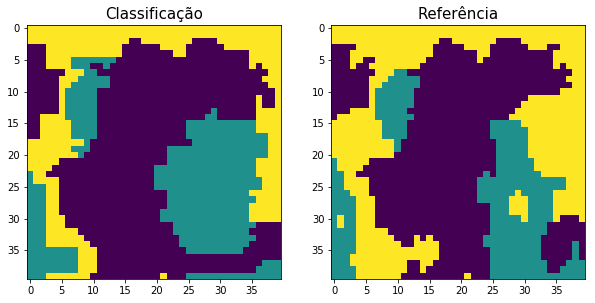

In [13]:
# desenhando na tela
plt.figure( figsize=(10, 10) )
plt.figure(1)
plt.subplot(1,2,1)
plt.title('Classificação', fontsize=15)
plt.imshow(map_class)
plt.colorbar

plt.subplot(1,2,2)
plt.imshow(map_ref)
plt.colorbar
plt.title('Referência', fontsize=15)

plt.show()

### Indetificando no mapa as amostras escolhidas:

Text(0.5,1,'Amostras mapa referência')

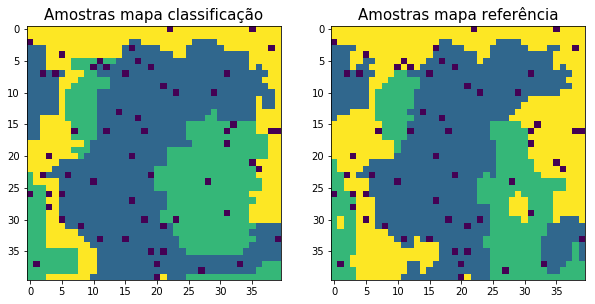

In [14]:
# desenhando na tela
plt.figure( figsize=(10, 10) )
plt.figure(1)
plt.subplot(1,2,1)
plt.imshow(map_clas_new)
plt.colorbar
plt.title('Amostras mapa classificação', fontsize=15)

plt.subplot(1,2,2)
plt.imshow(map_clasref_new)
plt.colorbar
plt.title('Amostras mapa referência', fontsize=15)